# Visualization

In this tutorial we're going to learn how to:
- Read in data tables (the easy way!)
- Select different samples from the data set
- Make figures to visualize the data

# Reading in data
Often, you will be given data in the form of an ASCII table.  This table will have multiple rows that indicate a star, or a galaxy, or a particle in a simulation, and the columns indicate different properties for the object such as its ID, brightness, mass, or distance.  Before we can select different samples of objects to study, we need to read in this data.  There are many ways to do this in Python: numpy, pandas, and astropy are commonly used packages.

- Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
- Astropy: http://docs.astropy.org/en/stable/io/ascii/

Let's first import these packages. Again, use CTRL-ENTER to execute each cell.

In [ ]:
import numpy as np
import pandas as pd
from astropy.io import ascii

Let's start with an example of reading in data into a Pandas `DataFrame`. Just as a `numpy` array is like a python list with extra super-powers, you can think of a Pandas `DataFrame` as an augmented `numpy` array with extra member functions to help you work with the data.

The data we will be using in this notebook should have been downloaded with the rest of the package into a "data" folder, so we use this for the file's location (e.g., your `Downloads` folder) in the next command. If the file isn't there, you'll get an error.

In [ ]:
data1=pd.read_csv('data/SNIa_DM.dat',delim_whitespace=True, skiprows=4)
print(data1)

Note that we had to tell Pandas to skip the first 4 rows (comments) and use white-space (spaces and tabs) to delimit the columns.

We can now look at the properties of data1.  Such as its dimensions:

In [ ]:
print(data1.shape)

There are 277 rows and 5 columns.  What are the names of the columns?

In [ ]:
print(data1.columns.values)

And what if we want to peak at all of the properties of the first 5 SN? Pandas `DataFrames` act just like arrays in this respect. Use the `numpy` array slicing you learned in our last tutorial to print out only the first 5 rows of `data1`.

If you want to look at the entries for a specific row, or using something more complicated than a slice (e.g., an index array), you need to use the `iloc` attribute of a Pandas DataFrame.

In [ ]:
print(data1.iloc[5])

We can also just select specific columns by using the names you found above.

In [ ]:
print(data1['DM'])

Now see if you can print out just the first 5 rows of the `'DM'` column. Try other combinations of column names and row slices.

Note that the index is always shown here.  If we just want the raw data in the form of a numpy array, we just do the following:

In [ ]:
print(data1['DM'].values)

A nice feature of `pandas` dataframes is you can use a short-hand notation for specifying columns as member data, as long as the label of the column doesn't confuse `python`. So I can access the '`DM`' column this way:

In [ ]:
print (data1.DM[0:5])

Try to do the same thing with the '`+/-`' column. You should get an error. That's because the `+`, `/`, and `-` are all numerical operators in `python`, so you can't use them as part of member variable names. Same goes with having a column that starts with a number or hash (`#`), etc. To access those columns, you need to fall back on the string index:

Next, we do a similar exercise reading in the data into an astropy Table:

In [ ]:
data2=ascii.read('data/SNIa_DM.dat')

print("Here are the column names:")
print(data2.colnames)
print("Here are the first 5 rows")
print(data2[:5])
print("Here are the first 5 elements of the DM column")
print(data2['DM'][:5])

Note that the `astropy.ascii` package requires fewer arguments (it's a little smarter about comments and delimiters), but `astropy` tables have a bit less functionality. Luckily, the `astropy` developers recognise that Pandas is pretty awesome, so you can convert an Astropy `Tables` object to a Pandas `DataFrame` object! (You can also convert Pandas DFs to Astropy Tables)

In [ ]:
data3=data2.to_pandas()
print(data3[:5])

The `astropy.io` module also has the ability to read `FITS` images and tables and understands *way* more data formats common to astronomers than `pandas`. So a good strategy could be to use `astropy.io` to read in the data, and then convert it to a `pandas` dataframe. Or, you might find that `astropy.tables` are sufficent for your needs. `astropy` is also emerging as the de-facto astronomical data analysis software and makes heavy use of `astropy.Tables`.

## Merging Tables

Something we do all the time is take one table of data and merge it with another table, based on the value in one or more columns that match. Here, `pandas` and `astropy` have very handy methods we can use. As an example, we have another data file, `data/SN_HostMass.dat`, that contains galaxy host masses for some of the supernovae in the `data/SNIa_DM.dat` file. Load up this data as a `pandas` dataframe, call it `data4`, and print out its shape, and print out the first five lines.

The simplest thing we can do is merge the two tables using the supernova name (column `SN`) to do the matching:

In [ ]:
merged = pd.merge(data3,data4, on='SN')
print (merged[0:7])
print (merged.shape)

This creates a table with the combined columns. Note that the table has fewer rows than `data3`, but more rows than `data4`. In cases where a SN is missing from either table, that row is dropped from the final table. In cases where multiple lines match, you get all combinations (notice that `SN2004ef` shows up four times because it is repeated in both tables). This is called an "inner join". If you want to include rows with missing data, you can specify the `how` argument:
 - `how = "inner"`:  (default) only include rows that match in both input tables
 - `how = "left"`: include all rows from the first table, but with possible missing data
 - `how = "right"`: include all rows form the second table, but with possible missing data
 - `how = "outer"`: include all rows from both tables, but with possible missing data
 
If there is a one-to-one correspondence between the rows in both tables, then these are all equivalent. For more information about how to combine tables, consult the [`Pandas` Documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html). Try using a different `how` argument in the command above and see what happens.

`astropy.Tables` also has the ability to merge tables, though it refers to it as "joining". See the documentation on the [`join` function](https://docs.astropy.org/en/stable/table/operations.html#join). One particular join operation that we often have to do is making cross-identifications based on sky coordinates (there is, unfortunately, no single agreed-upon set of names for astronomical objects). You can achieve this with `astropy.Tables` and `astropy.coordinates`. See the [documentation here](https://docs.astropy.org/en/stable/table/operations.html#joining-coordinates-and-custom-join-functions).

## Writing data
Writing data in Pandas is just as simple as reading it in:

In [ ]:
data3.to_csv('data/output.dat',index=False,sep=' ')
# the 'index' keyword gives you the option of also printing the Pandas index
# the 'sep' keyword specifies the delimiter between columns

And again, `astropy.Tables` has an advantage for astronomers:  it not only can input several different formats, it can output them as well. A complete listing of formats can be found [here](https://docs.astropy.org/en/stable/io/ascii/index.html#supported-formats). To output as a fixed-width ASCII file (a format that a human can read with nicely formatted columns), you can do the following:

In [ ]:
data2.write('data/data2.txt', format='ascii.fixed_width', delimiter=' ')

# Selecting Data
Most of the time you will be dealing with subsets of your data set, e.g., galaxies at a certain redshift, stars at a particular distance or brightness, you want to get rid of outliers, etc.  We therefore need to select the desired sample using conditionals.  We'll use a Pandas DataFrame as an example. Here, we create a `pandas` column called `ix` that contains True/False values for each row in `data1` based on a condition:  True if redshift is less than 0.02, False otherwise. This new array, if used as an index, will pick out only those rows that are True. This is often referred to as creating a 'mask'.

In [ ]:
ix = (data1.zcmb < 0.02)
print(ix)
print(data1[ix][0:5])

Try selecting the data from each survey and compute its median redshift. Hint: the dataframes and columns have a `median` function. 

# Plotting
The most popular plotting package in Python is `matplotlib` but there are several others one might want to explore.  Here we will show you how to make basic plots in matplotlib.  The references below are useful:

- http://matplotlib.org/gallery.html
- http://matplotlib.org/api/pyplot_api.html

First, let's invoke an iPython [magic command](http://ipython.readthedocs.io/en/stable/interactive/magics.html) (i.e., beginning with a %) so that the plots that are made will show up in this notebook.

In [1]:
%matplotlib notebook

`pyplot` is the main plotting module in `matplotlib`, it is commonly imported on its own as `plt`.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Now let's make some fake data to play with and plot. Create an array `x` from 0 to 9 inclusive (this is just a suggestion, you can make whatever `x` you want). Now make a new array `y` that is the square of `x` (or whatever function you like).

In [8]:
a = np.array([0,1,2,3,4,5,6,7,8,9])
b = np.arange(10)
c = np.linspace(0,9,10)
x = c
y = x**2
print(x)
print(y)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[ 0.  1.  4.  9. 16. 25. 36. 49. 64. 81.]


Given this simple 1D data, this is probably the quickest way to make a figure:

<IPython.core.display.Javascript object>


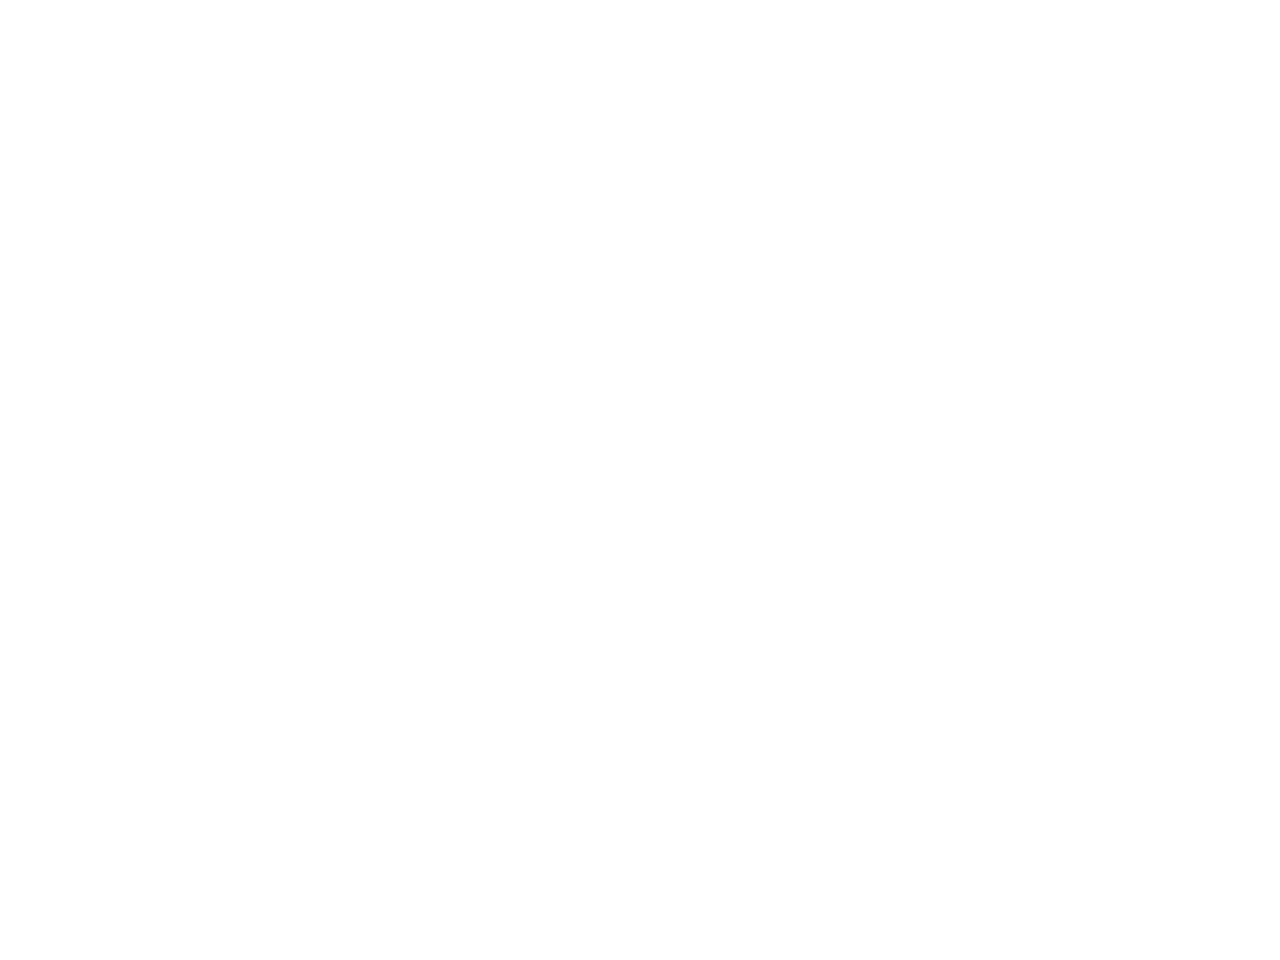

ValueError: Unrecognized character i in format string

In [17]:
plt.plot(x,y,'pinkp',ms=10)

# The string 'bo' above indicates that the points will be blue(b) circles(o)

Note that `matplotlib` does a lot of things automatically for you, like setting the limits on the axes as well as the interval between major tick marks.  These are all things that you can adjust manually with more code.

Below is the long form to getting the same symbols as above.  By including more code, you can start to tinker around with different aspects of the plot. Many of matplotlib's optional arguments have a long and short form (e.g., you can specify `linestyle='-'` or the shorter `ls='-'`. Try different linestyles: '--', '-.'. Try different symbols: 's', 'd', '*'.

<IPython.core.display.Javascript object>


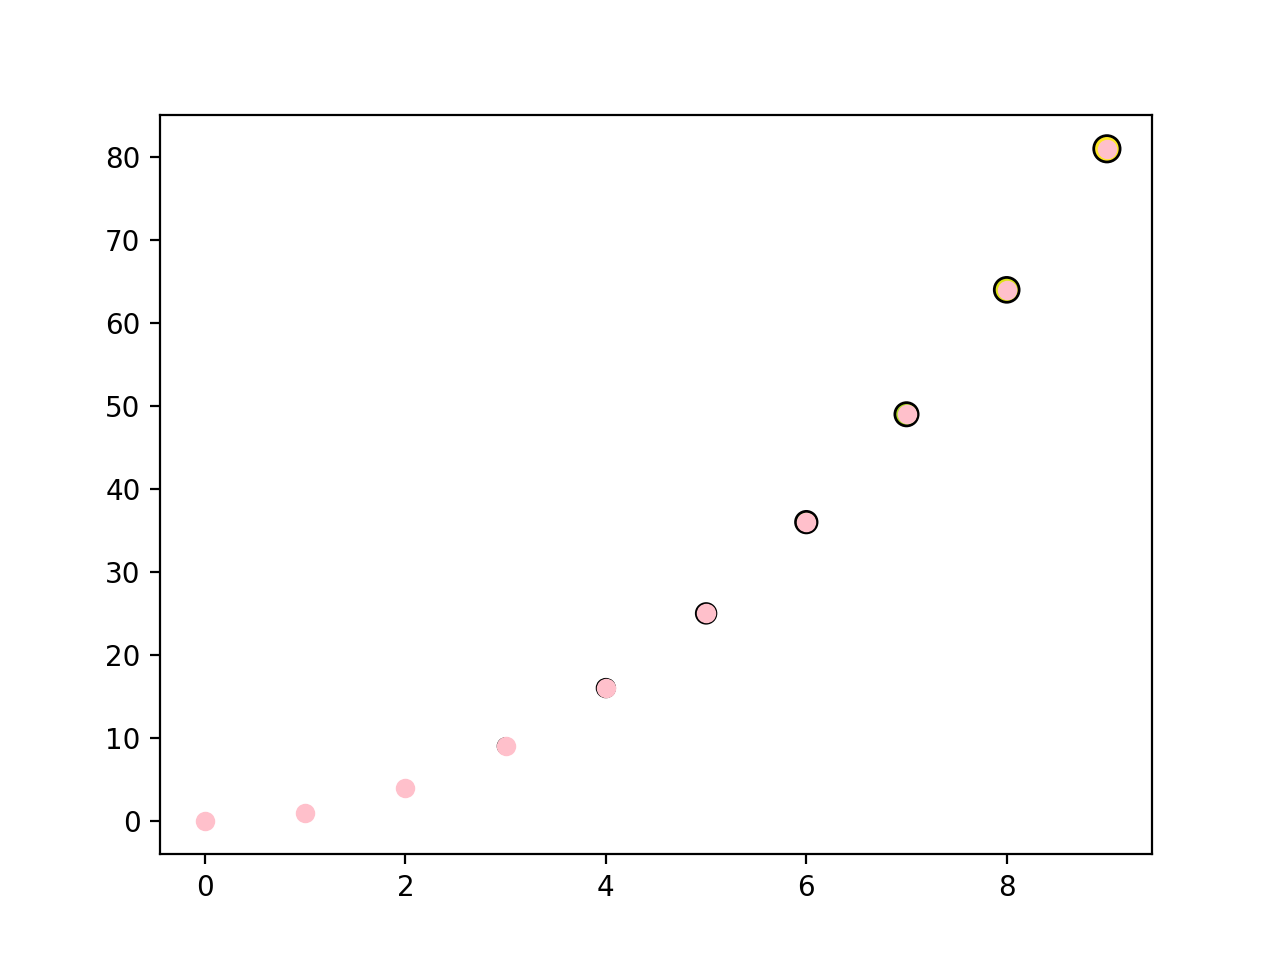

In [22]:
plt.plot(x,y,color='pink',marker='o',ms=6,linestyle='None')
plt.show()

Yet another way to make the same plot, using the `scatter` function:

C:\Users\Shengqi Yang\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


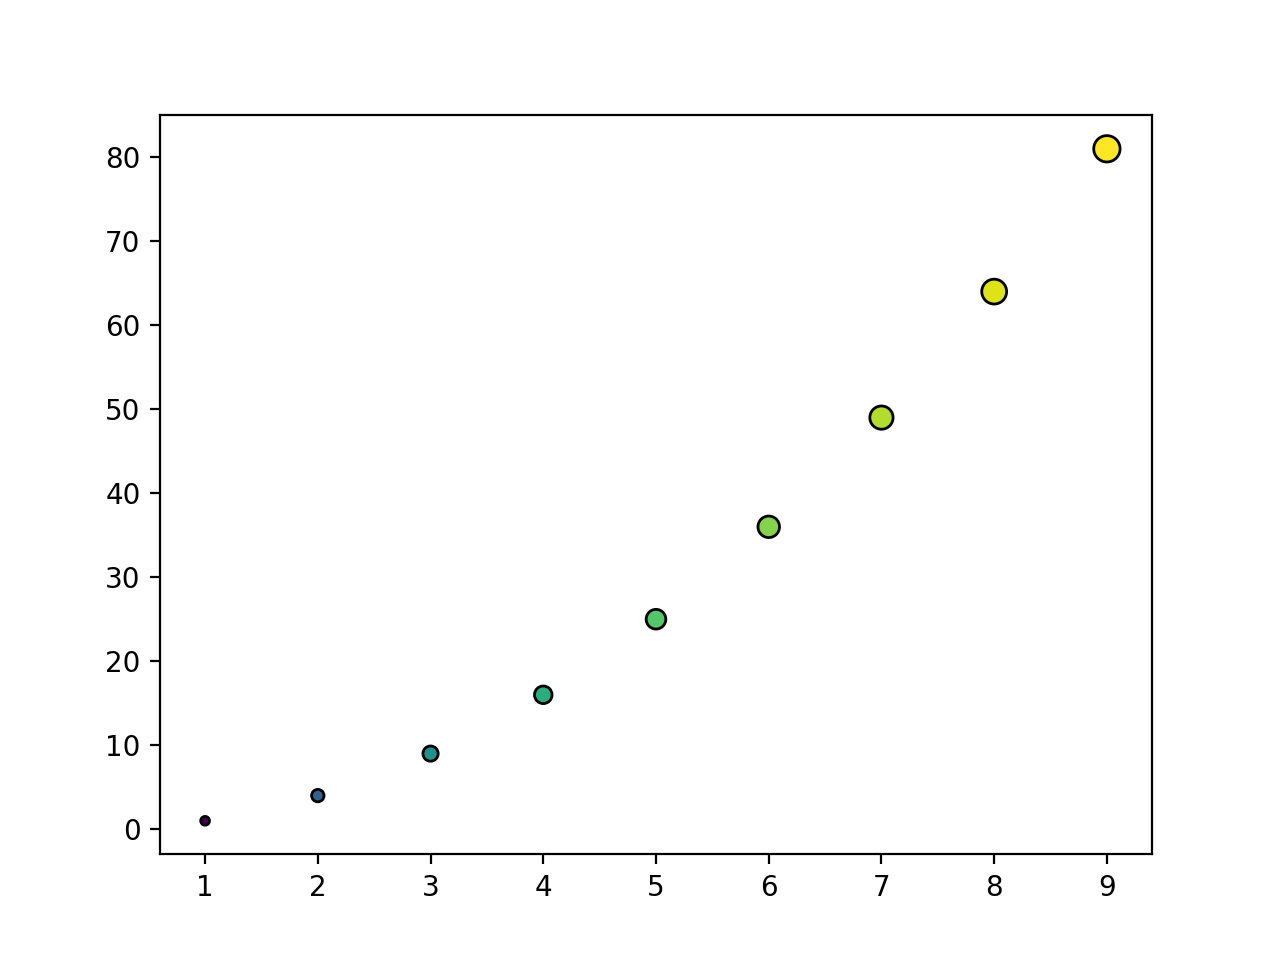

In [24]:
plt.scatter(x,y,s=10*np.sqrt(y),c=np.log10(x),edgecolors='black')

The above examples are the quickest, easiest ways to produce a figure in `matplotlib` and are great for quick and dirty data exploration.  However, when it comes time to make "publication quality" graphs, you'll find that including more lines of code will make things easier down the road as it will provide for more functionality.  Below, we invoke the `subplots` function, which returns `figure` and `axis` objects.  These objects let us manipuate the figure as a whole as well as each sub-plot. We can also specify some different colors, symbols, and line styles. This way of using `matplotlib` is more *pythonic*. The previous way was more akin to using `MATLAB` and it was the developer's intention to make it more intuitive. Most examples use the *pythonic* methods.

<IPython.core.display.Javascript object>


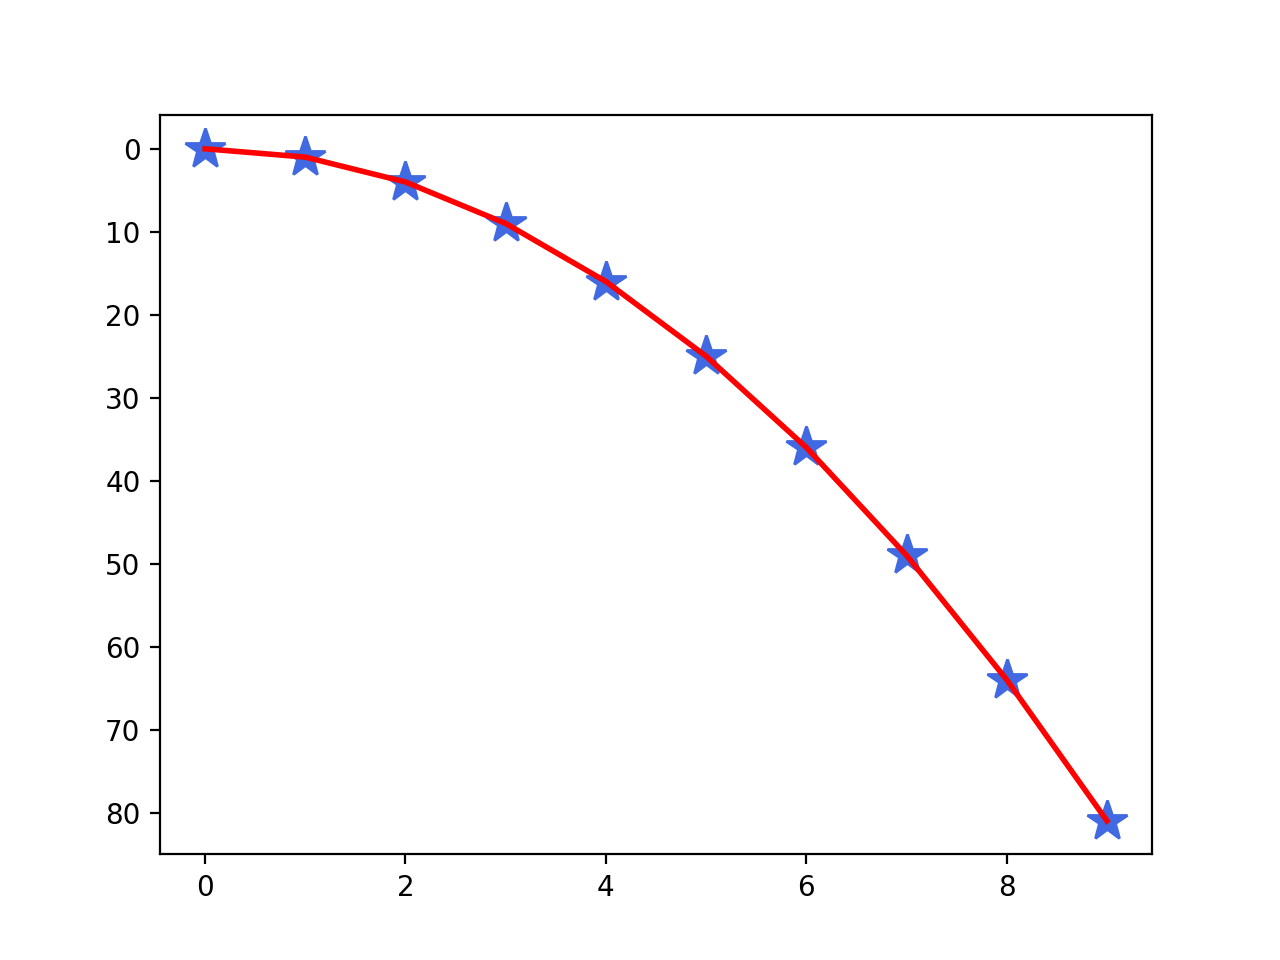

In [31]:
fig, ax = plt.subplots()

# We then use ax to do our plotting
ax.plot(x,y,color='red',ls='-',lw=2,alpha=1,zorder=1)
ax.plot(x,y,color='royalblue',marker='*',ms=15,ls='None',zorder=0)

ax.invert_yaxis()

So this produces the same kind of plot as above, but now we can use `ax` to manipuate the `axes`:

<IPython.core.display.Javascript object>


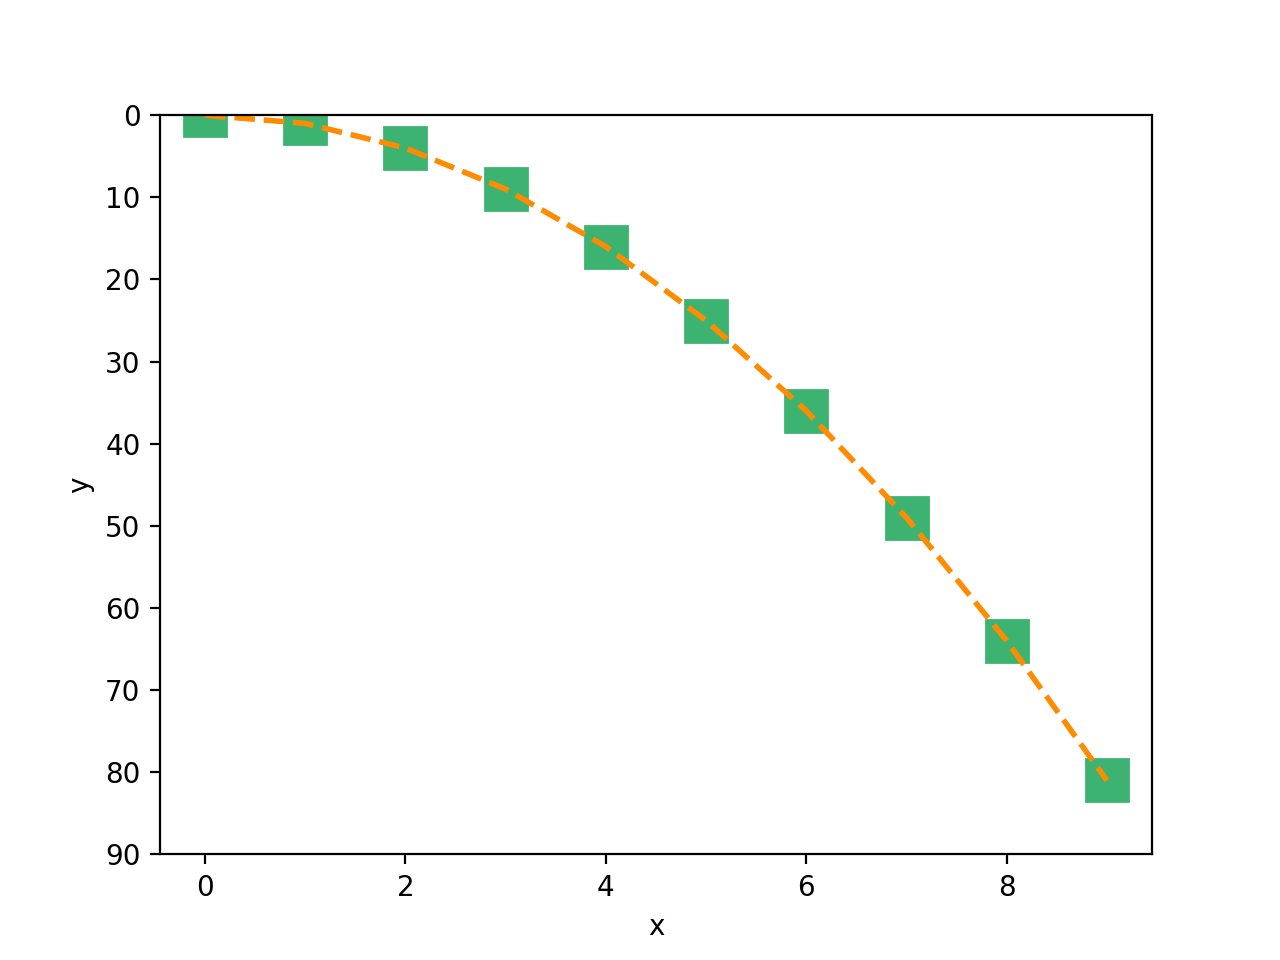

In [32]:
fig, ax = plt.subplots()
ax.set_ylim((90,0))           # set limits on y-axis
ax.set_xlabel('x') # set label for x-axis
ax.set_ylabel('y') # set label for y-axis
ax.plot(x,y,color='mediumseagreen',marker='s',ms=15,ls='None')
ax.plot(x,y,color='darkorange',ls='--',lw=2)

Often, you'll want an axis to be on a logarithmic scale:

<IPython.core.display.Javascript object>


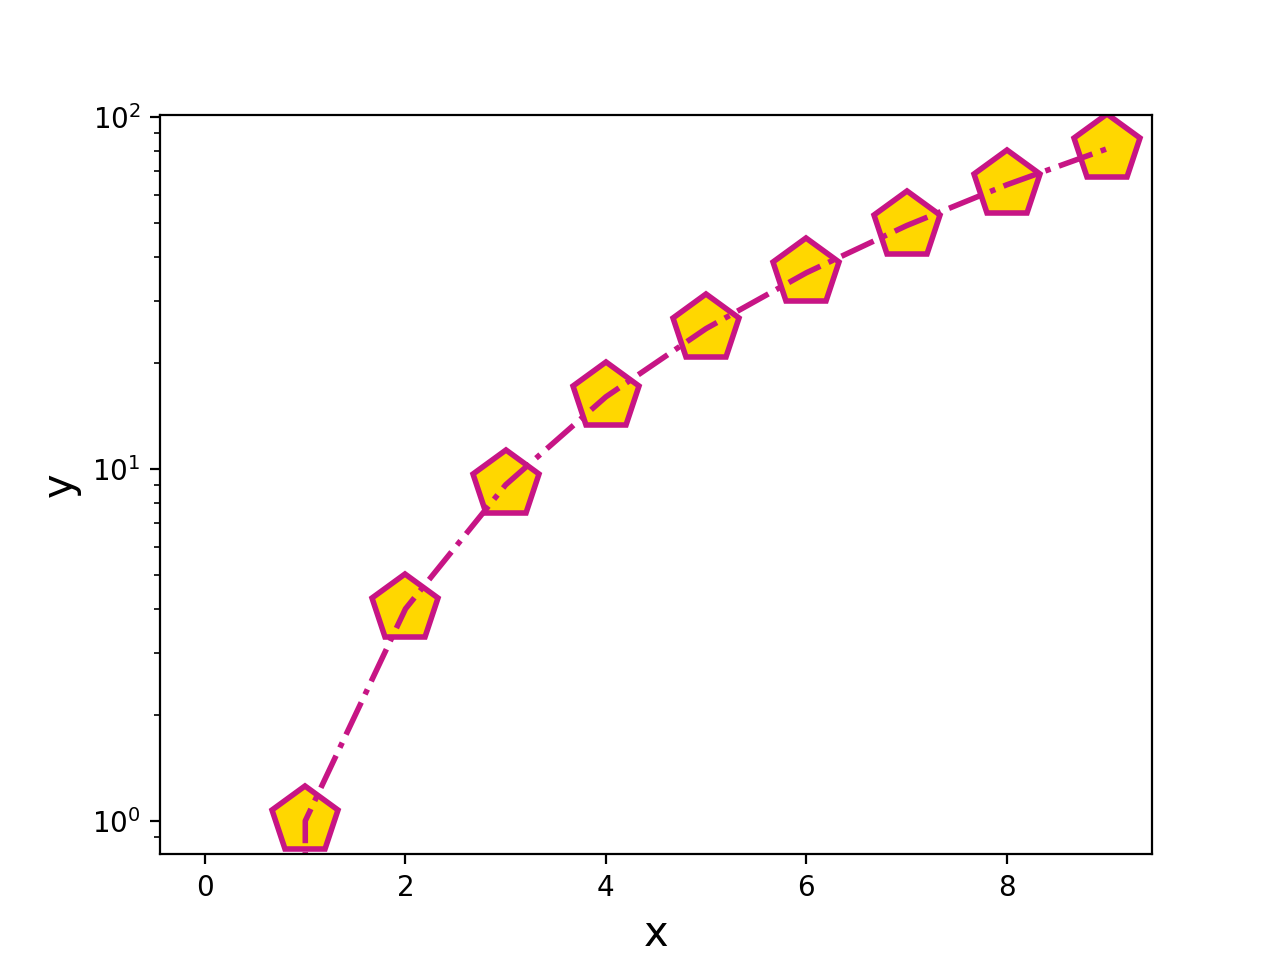

In [34]:
fig, ax = plt.subplots()

ax.set_yscale('log') # set y-axis to be in log

ax.set_xlabel('x',fontsize=15)
ax.set_ylabel('y',fontsize=15)
ax.plot(x,y,color='gold',mec='mediumvioletred',mew=2,marker='p',ms=25,ls='None')
ax.plot(x,y,color='mediumvioletred',ls='dashdot',lw=2)

## Multiple figures

Sometimes you'll want two figures side-by-side, or a grid of 3x3, etc, etc...

<IPython.core.display.Javascript object>


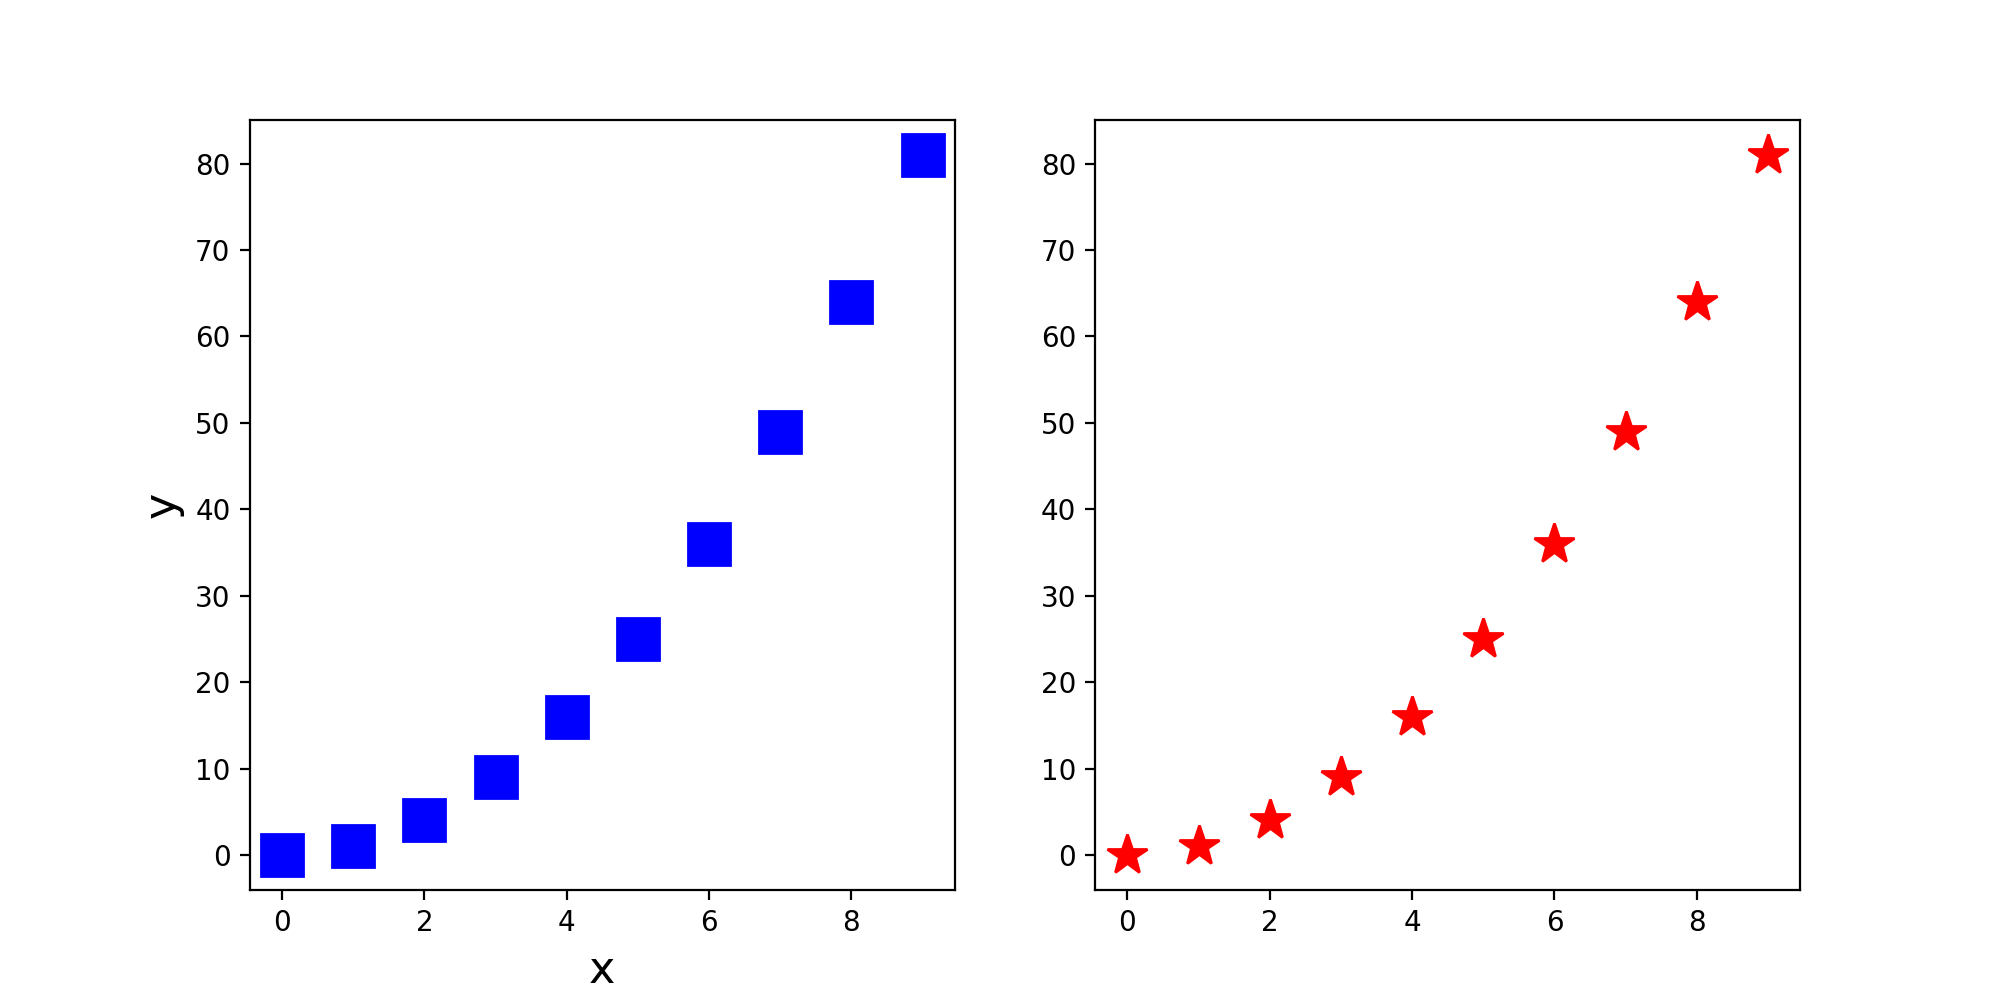

Text(0, 0.5, 'y')

In [36]:
# two figures, side by side:
fig, axarr = plt.subplots(1,2,figsize=(10,5))

# axarr is an array of axis objects, with each element representing one subplot

# first subplot
ax1 = axarr[0]
ax1.plot(x,y,color='blue',marker='s',ms=15,ls='None')


# second subplot
ax2=axarr[1]
ax2.plot(x,y,color='red',marker='*',ms=15,ls='None')

# change title on first subplot
#ax=axarr[0]
ax1.set_xlabel('x',fontsize=16)
ax1.set_ylabel('y',fontsize=16)

Using `subplots`, which returns an axis array, is useful for going back and forth between different figures.  Note how we can go back to `axarr[0]` at the end and change the label on the x axis.

If you have a bunch of images or the same type of figure for multiple objects, it helps to make a giant grid of subplots.  And rather than manually declaring a new subplot each time, it helps to automate the process with `for` loop(s).

<IPython.core.display.Javascript object>


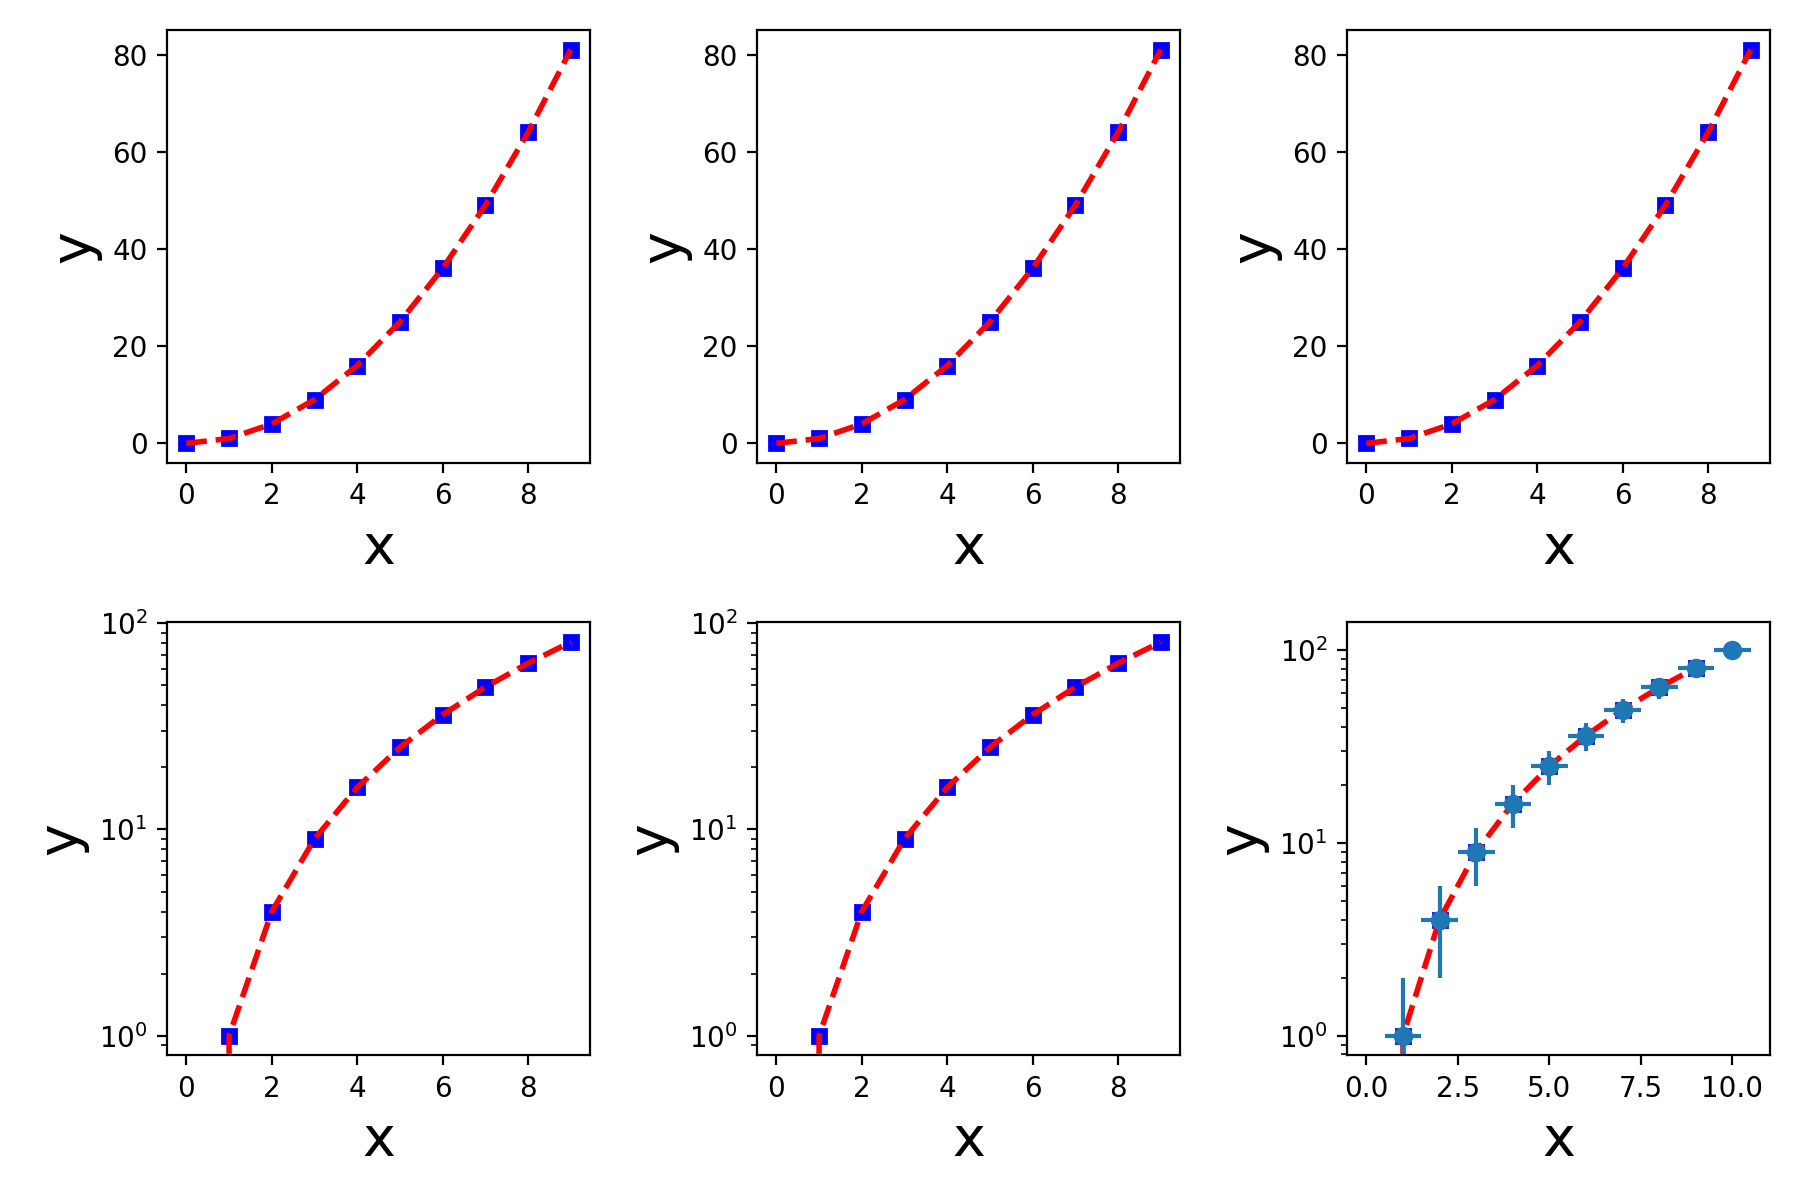

In [37]:
nrow=2
ncol=3
fig, axarr = plt.subplots(nrow,ncol,figsize=(9,6))

for ii in range(nrow):
    for jj in range(ncol):
        ax=axarr[ii,jj]
        if ii==nrow-1: ax.set_yscale('log')
        ax.set_xlabel('x', fontsize=20)
        ax.set_ylabel('y', fontsize=20)
        ax.plot(x,y,color='blue',marker='s',ms=5,ls='None')
        ax.plot(x,y,color='red',ls='--',lw=2)
fig.tight_layout()

`subplots` has many useful features, like the the `sharex` and `sharey` keywords, which allow you to declare that the axes for each subplot have the same scale.  Invoking `subplots_adjust` can then optionally allow you to squish the subplots together. 

<IPython.core.display.Javascript object>


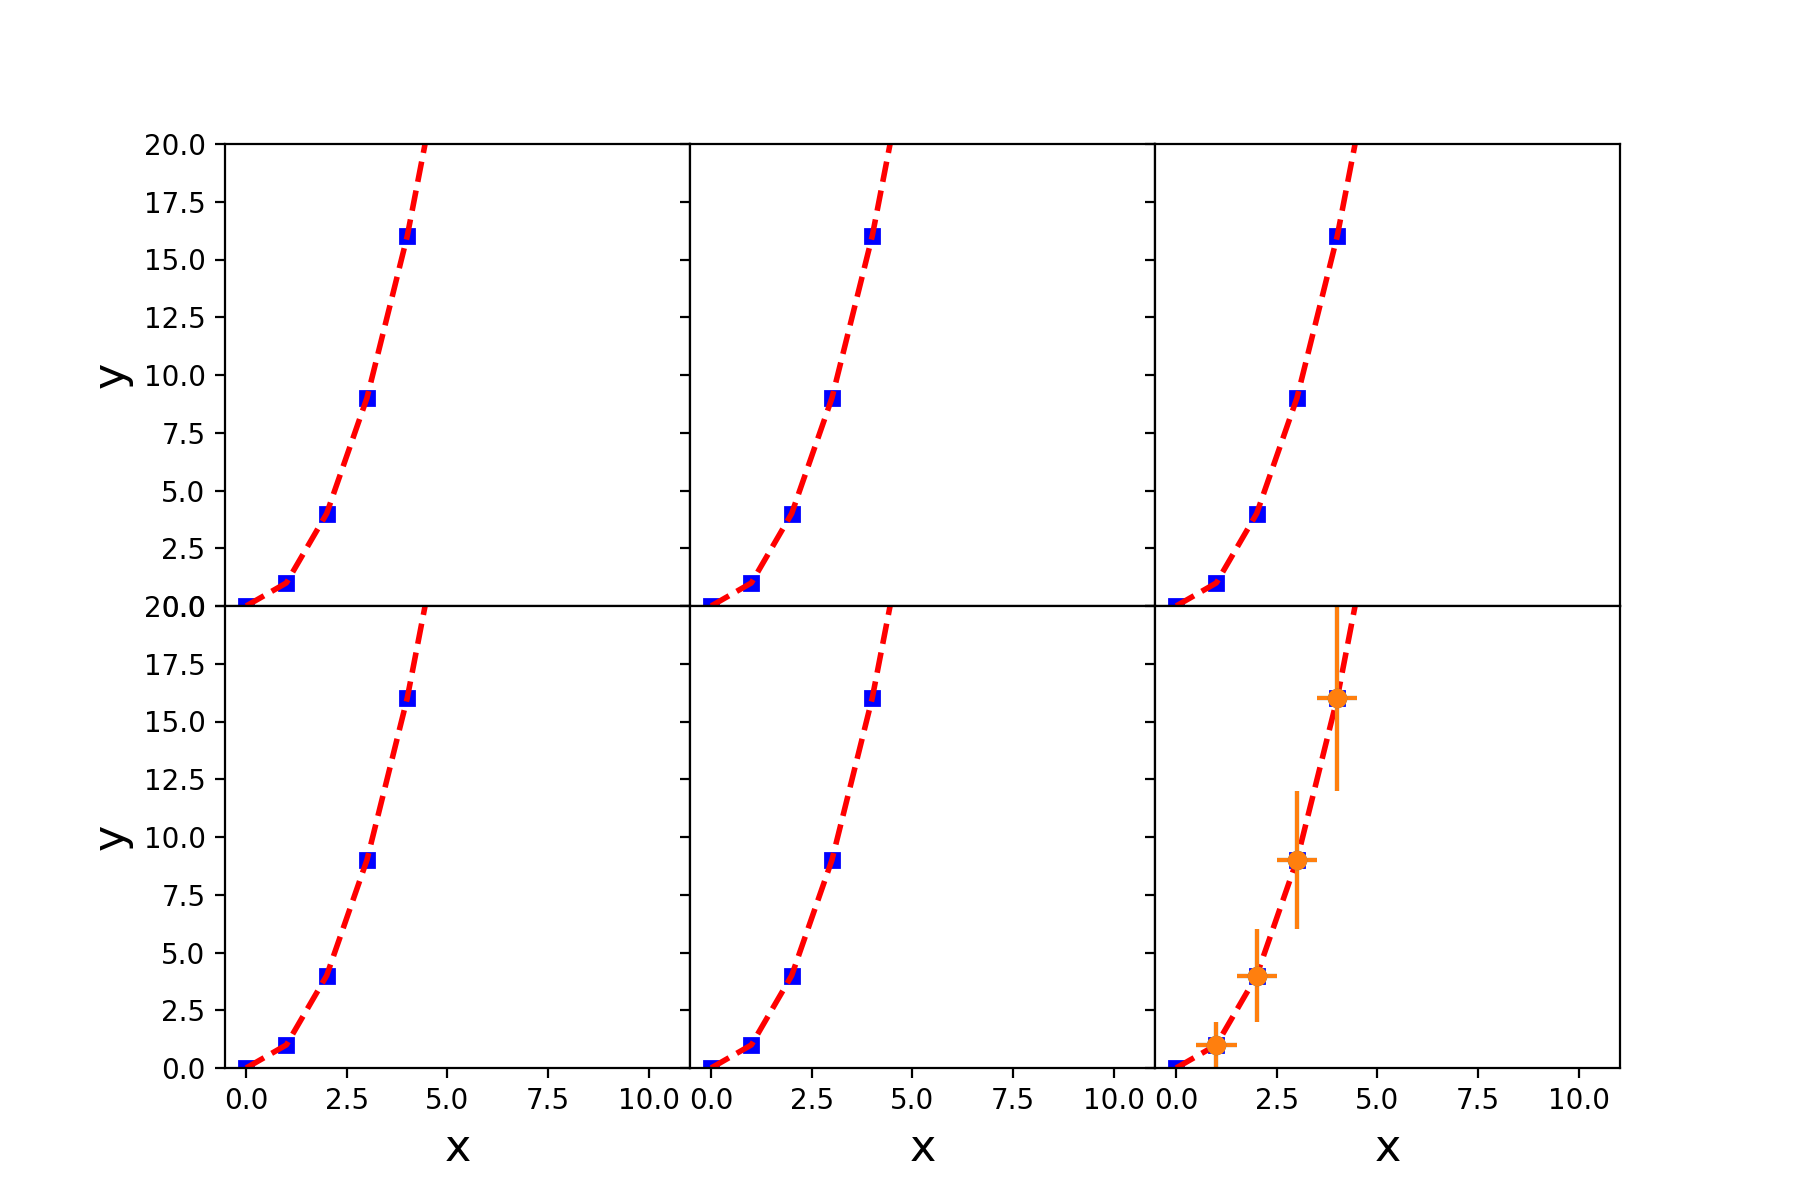

(0.0, 20.0)

In [38]:
nrow=2
ncol=3
fig, axarr = plt.subplots(nrow,ncol,figsize=(9,6),sharex=True,sharey=True)
plt.subplots_adjust(hspace=0,wspace=0)

for ii in range(nrow):
    for jj in range(ncol):
        ax=axarr[ii,jj]
        if ii==nrow-1:
            ax.set_xlabel('x',fontsize=16)
        if jj==0:
            ax.set_ylabel('y',fontsize=16)
        ax.plot(x,y,color='blue',marker='s',ms=5,ls='None')
        ax.plot(x,y,color='red',ls='--',lw=2)
axarr[1,2].set_ylim(0,20)

# Labeling
Legends, text labels, LaTeX. 

<IPython.core.display.Javascript object>


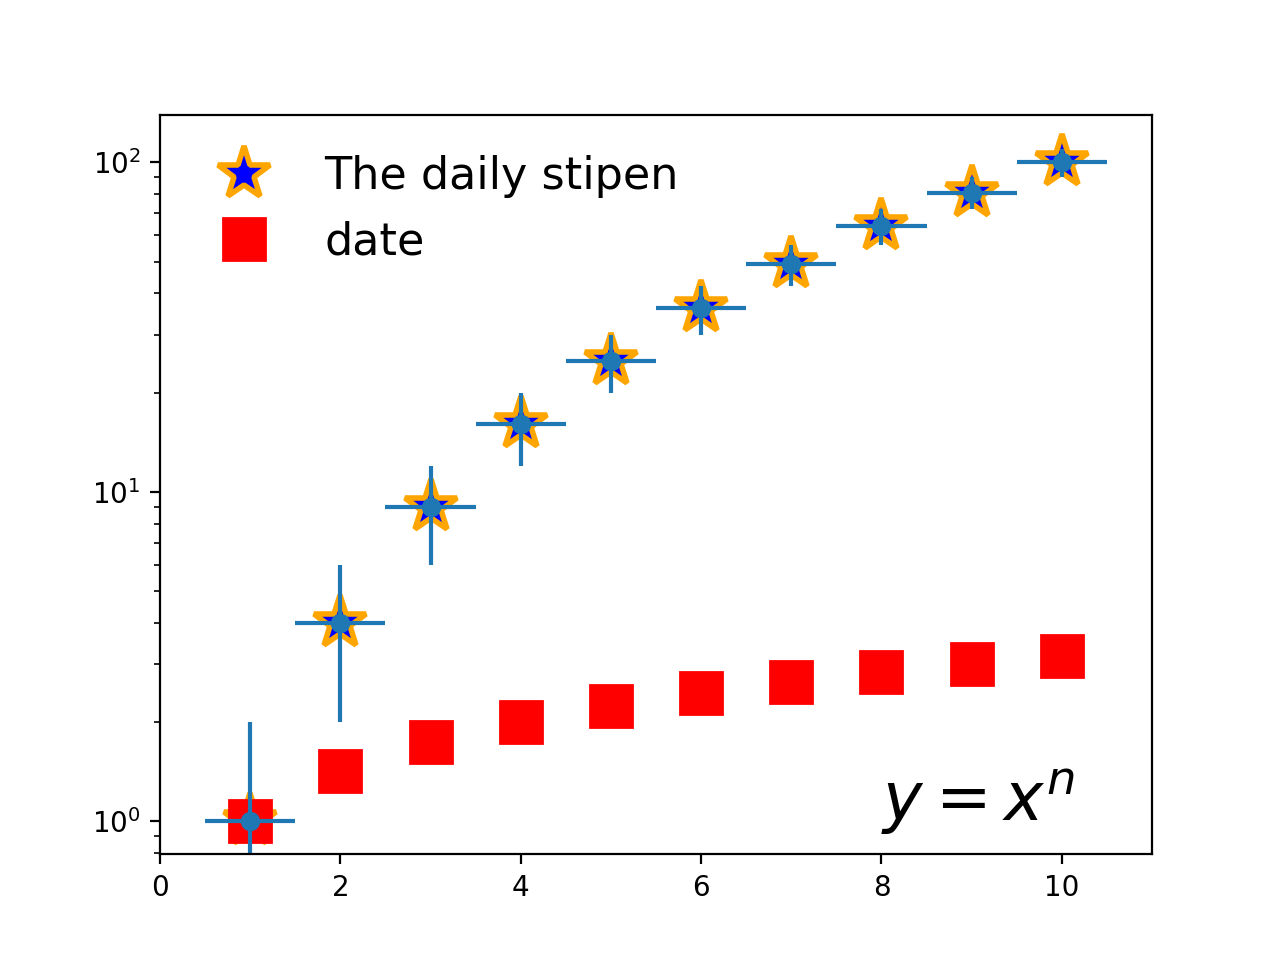

In [54]:
x=np.arange(10)+1.
y1=x**2
y2=np.sqrt(x)

fig, ax = plt.subplots()
ax.set_yscale('log')
# The `label` keyword below is used to specify the label for the particular data set
ax.plot(x,y1,color='blue',mec='orange',mew=2,marker='*',ms=20,ls='None',label='The daily stipen')
ax.plot(x,y2,color='red',marker='s',ms=15,ls='None',label='date')
ax.text(8,1,'$y=x^{n}$',fontsize=24)
ax.legend(loc='upper left',fontsize=16,frameon=False)

# Other useful types of figures: 
- Error bars: We're scientists! Almost every data point you put on a figure should have an error bar.
- Histograms: useful for looking at distribution of values for a particular variable
- Images: e.g., cutouts of stars, galaxies, nebulae, etc.
- Many others that we don't have time to cover here!

Error bars:

In [60]:
np.zeros(10)+5

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

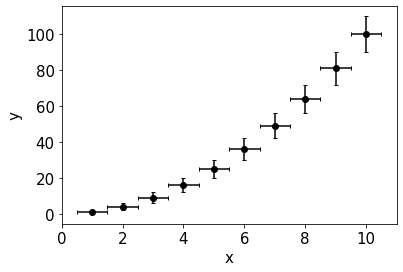

In [14]:
import matplotlib.pyplot as plt
import numpy as np
# first, generate some fake data

fontsize = 15

x=np.arange(10)+1.
y=x**2

xerr=np.zeros(10)+0.5 # fixed error in x
yerr=np.sqrt(y) # Poisson error in y

plt.errorbar(x,y,xerr=xerr,yerr=yerr,marker='o',ls='None',markeredgecolor='k',markerfacecolor='k',ecolor='k',capsize=2)
plt.xlabel('x',fontsize=fontsize)
plt.ylabel('y',fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)


Histogram of Gaussians:

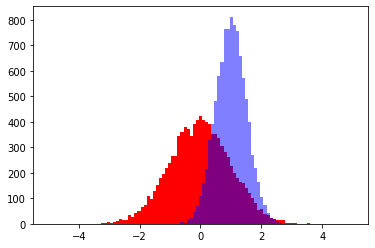

In [21]:
import numpy.random as npr

x1=npr.randn(10000)        # mean=0, std=1.0
x2=npr.randn(10000)*0.5+1. # mean=1, std=0.5

bins=np.linspace(-5.,5.,100)

info1 = plt.hist(x1,bins=bins, color='red',lw=1)#, histtype='step')
info2 = plt.hist(x2,bins=bins, color='blue',lw=1,alpha=0.5)#, histtype='step')

 Display an image from a FITS file. `FITS` stands for "Flexible Image Transport System". It can contain image data, table data, and usually has a header with lots and lots of meta-data (date of observation, telescope name, coordinates, etc, etc).

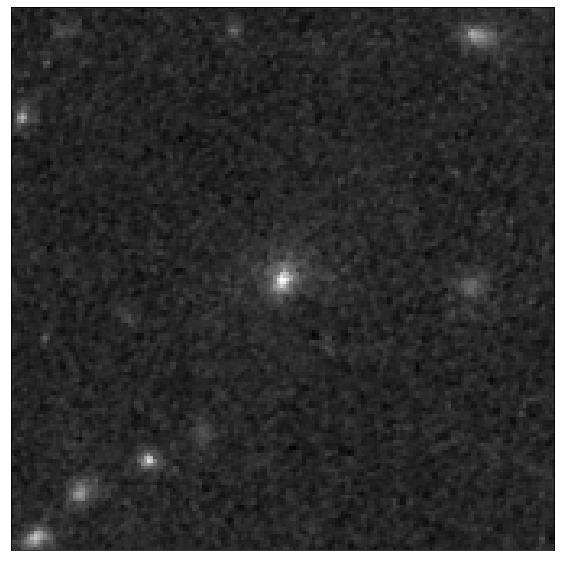

In [26]:
# Display an image from a FITS file

from astropy.io import fits

im3433=fits.open('data/im3433.fits')
im=im3433[0].data # the first extension (i.e., index 0), contains the image data

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(im,interpolation='none',origin='lower',cmap='gray')
ax.get_xaxis().set_visible(False) # comment these two lines to see what happens
ax.get_yaxis().set_visible(False)

# Doing some math on images

Here's another example using some supernova data, which will have been downloaded as part of our github package.

We will plot these two images side-by-side. We specify `vmin=-40` and `vmax=40` in the `imshow()` function, which will set appropriate
limits on the color map (there are saturated pixels that will cause the image to be washed out otherwise). We also choose the
reverse color map (`gray_r`). Question: where's the supernova? 

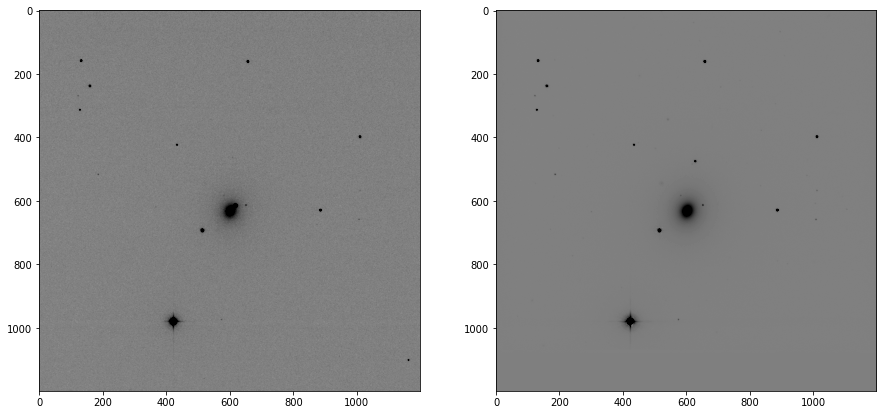

In [27]:
im1 = fits.open('data/SN2011iv_B_SWO_DC_2011_12_11SN.fits')
im2 = fits.open('data/SN2011iv_B_template.fits')
fig,ax = plt.subplots(1,2, figsize=(15,8))
ax[0].imshow(im1[0].data, vmin=-40,vmax=40, cmap='gray_r')
ax[1].imshow(im2[0].data, vmin=-40,vmax=40, cmap='gray_r')

These two images are from different epochs. So if you subtract one from the other and plot out the results, the supernova (and anything else that changed) should stand out. Try this. There's a surprise.

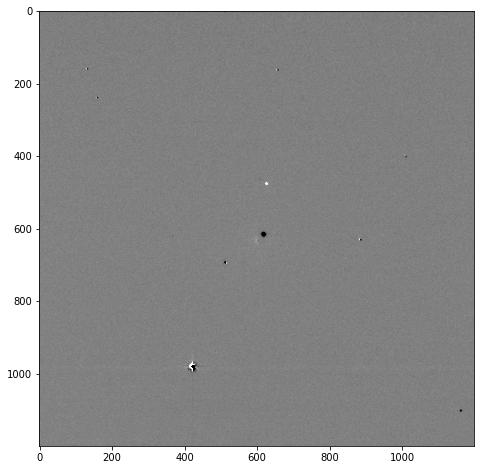

In [30]:
im_diff = im1[0].data-im2[0].data
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(im_diff, vmin=-40,vmax=40, cmap='gray_r')

## Saving a figure to a directory
Inline plotting like what we've been doing above is useful for quick viewing, but most of the time you'll want to save your figure to a folder somewhere and in a specific format.  Let's save one of the figures above to disk:

In [31]:
x=np.arange(10)+1.
y1=x**2
y2=np.sqrt(x)

fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(x,y1,color='blue',marker='*',ms=15,ls='None',label='$y=x^2$')
ax.plot(x,y2,color='red',marker='s',ms=15,ls='None',label='$y=\sqrt{x}$')
ax.text(6,10,'Hi there!')
ax.legend(loc='upper left',fontsize=16,numpoints=1)

# Note these two lines
fig.savefig('example.pdf',format='pdf',bbox_inches='tight')
fig.savefig('example.png',bbox_inches='tight')
fig.savefig('example.jpg',bbox_inches='tight')
plt.close()

# Analyze one of these data sets by making figures...
Now that you've learned the basics of Python and its plotting package, `matplotlib`, download one of these data sets, make some figures, and tell us what you see:
- **Galaxies**: 
    - Data: [galsample1.dat](https://dl.dropboxusercontent.com/u/28917100/carnegie/summer2016/galsample1.dat), [galsample2.dat](https://dl.dropboxusercontent.com/u/28917100/carnegie/summer2016/galsample2.dat)
    - The two files represent two different galaxy samples.  The columns represent, (1) the galaxy ID, (2) right ascension (RA) in units of decimal degrees, (3) declination (Dec) in units of decimal degrees (i.e., latter two columns are similar to longitude and latitude, but project on the sky), (4) the redshift (i.e., a measure of the recession velocity due to the Doppler shift of light from the galaxy.  If one assumes a cosmology, the redshift translates into a distance), (5), the total stellar mass of the galaxy in units of $\log(M/M_{\odot})$, and (6) the star formation rate of the galaxy in units of $M_{\odot}~{\rm yr}^{-1}$.
        - What is the difference between the two samples? Qualitatively, and quantitatively?
- **Supernovae**:
    - Data: [SNIa_DM.dat](https://dl.dropboxusercontent.com/u/28917100/carnegie/summer2016/SNIa_DM.dat)
    - There are five columns: SN name, redshift (`zcmb`), Distance modulus (`DM`), error `eDM`, and a survey number.
    - Try plotting a Hubble diagram (`DM` on the y-axis, `zcmb` on the x-axis) with errorbars.
    - Use logarithmic x-axis to make the Hubble diagram straight.
    - Plot the two different surveys in different colors/symbols.
    - Try plotting different *theoretical* Hubble laws (with different Hubble constants) with lines:
      $$ DM = 5\log_{10}\left(\frac{cz}{H_0}\right) + 25 $$
    - Do chi-by-eye to meausre $H_0$. Note that if $H_0$ is in $km/s/Mpc$, then $c = 3\times 10^{5} km/s$.
    
# More Advanced Visualization
There's tons more "out there" for helping you visualize your data. In the folder you downloaded, there is another `ipython` notebook called `Skyfit.ipynb` which shows you an example of using one such package:  `Bokeh`. We encourage you to have a look at it, as it may give you ideas for handling your own summer research project. The math is pretty dense, but the real point is to see how data can be manipulated, fit, and visualized.

Let's first import all the packages we will need.

In [79]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

Then let's load the supernova catalog.

In [80]:
Data = pd.read_csv('data/SNIa_DM.dat',delim_whitespace=True, skiprows=4)

zcmb   = Data.zcmb.values
DM     = Data.DM.values
DM_err = Data['+/-'].values
survey = Data.survey.values

Next, we define the function specified at the beginning of this section.

In [81]:
def DM_model(logz,H0):
    return 5*(np.log10(3*10**5/H0)+logz)+25

Now we are ready to fit for the Hubble parameter! We will fit $H_0$ for survey 1 and survey 2 seperately.

In [83]:
idx1_valid   = np.where((DM_err>0)&(survey==1))[0]
popt1, pcov1 = curve_fit(DM_model,np.log10(zcmb[idx1_valid]),DM[idx1_valid],sigma=DM_err[idx1_valid])
print('H0 =',popt1[0],'+/-',np.sqrt(pcov1)[0][0],'[km/s/Mpc] for survey 1')

idx2_valid   = np.where((DM_err>0)&(survey==2))[0]
popt2, pcov2 = curve_fit(DM_model,np.log10(zcmb[idx2_valid]),DM[idx2_valid],sigma=DM_err[idx2_valid])
print('H0 =',popt2[0],'+/-',np.sqrt(pcov2)[0][0],'[km/s/Mpc] for survey 2')

H0 = 73.15001352528321 +/- 0.624509056264018 [km/s/Mpc] for survey 1
H0 = 71.30245219798228 +/- 0.5501608597182198 [km/s/Mpc] for survey 2


Wow! The Hubble parameters constrained by survey 1 and 2 disagree with each other by about $3\sigma$!? 
Let's plot the fitting results.

Text(0.5, 1.0, 'Survey 2')

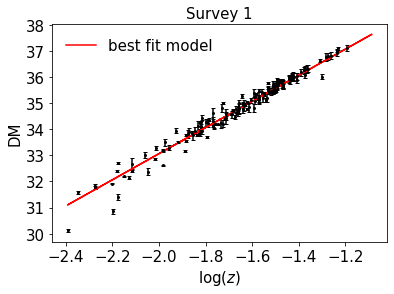

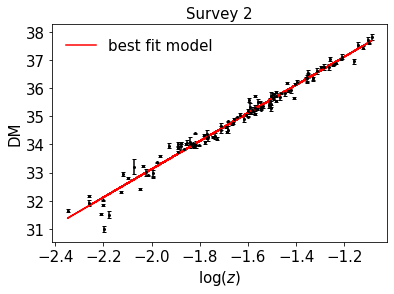

In [84]:
fontsize     = 15
plt.figure(1)
plt.errorbar(np.log10(zcmb[idx1_valid]),DM[idx1_valid],yerr=DM_err[idx1_valid],linestyle='none',ecolor='k',markeredgecolor='k',markerfacecolor='k',
             marker='o',ms=2,capsize=2)
plt.plot(np.log10(zcmb),DM_model(np.log10(zcmb),popt1[0]),'r',label='best fit model')
plt.xlabel(r'$\log(z)$',fontsize=fontsize)
plt.ylabel(r'DM',fontsize=fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.legend(frameon=False,fontsize=fontsize)
plt.title('Survey 1',fontsize=fontsize)

plt.figure(2)
plt.errorbar(np.log10(zcmb[idx2_valid]),DM[idx2_valid],yerr=DM_err[idx2_valid],linestyle='none',ecolor='k',markeredgecolor='k',markerfacecolor='k',
             marker='o',ms=2,capsize=2)
plt.plot(np.log10(zcmb[idx2_valid]),DM_model(np.log10(zcmb[idx2_valid]),popt2[0]),'r',label='best fit model')
plt.xlabel(r'$\log(z)$',fontsize=fontsize)
plt.ylabel(r'DM',fontsize=fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.legend(frameon=False,fontsize=fontsize)
plt.title('Survey 2',fontsize=fontsize)